# Boston Housing Statistical Analysis Assignment
This assignment is for the project in week 7 of the Statistics for Data Science with Python on Coursera.com <br>
Author: **Kate Fradley** <br>
Date: **Wednesday 07/12/2022** <br>

<hr/>

# Section 1: Setup

<hr/>

In [34]:
# importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [4]:
# importing data for project as directed
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
#quick check to familarise myself with the data shape and dimensions. 
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [6]:
#quick peak at the data in its origianl format. 
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<hr/>

# Section 2: Visualisation

<hr/>

## Task 1: Plotting boxplot of MEDV variable

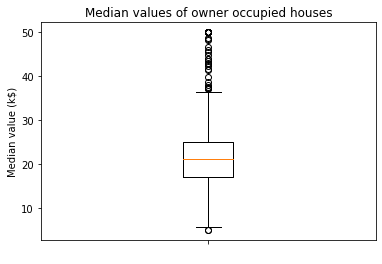

In [44]:
plt.boxplot(boston_df["MEDV"], labels = " ")

plt.ylabel("Median value (k$)")
plt.title("Median values of owner occupied houses")
plt.show()

## Task 2: Plotting bar plot of houses relative to the Charles River boundary

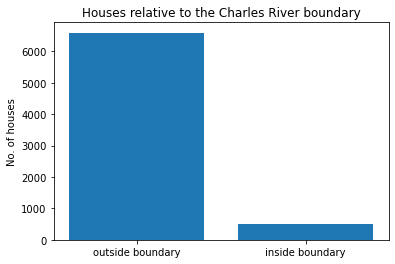

In [11]:
chas_yes = boston_df[boston_df["CHAS"]==1].size
chas_no =  boston_df[boston_df["CHAS"]==0].size

plt.bar((1,0), (chas_yes,chas_no), tick_label = ("inside boundary","outside boundary"))
plt.ylabel("No. of houses")
plt.title("Houses relative to the Charles River boundary")
plt.show()

## Task 3: Plotting boxplot of house values split by age groups

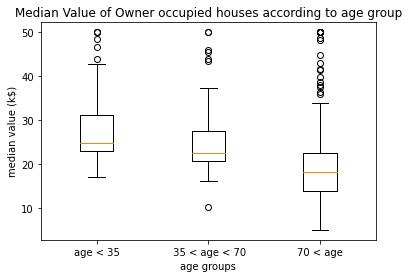

In [45]:
# creating a new dimension to data, under which each line is labelled accoridingly. 
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

#plotting MEDV variable using age groups as defined above
plt.boxplot((boston_df[boston_df["age_group"]=="35 years and younger"]["MEDV"],
             boston_df[boston_df["age_group"]=="between 35 and 70 years"]["MEDV"],
            boston_df[boston_df["age_group"]=="70 years and older"]["MEDV"]), 
           labels = ("age < 35", " 35 < age < 70", "70 < age") )
plt.xlabel("age groups")
plt.ylabel("median value (k$)")
plt.title("Median Value of Owner occupied houses according to age group")
plt.show()

## Task 4: Plotting a scatter plot of NOx concentration against Industry density

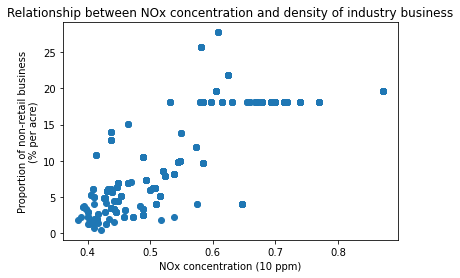

In [47]:
#plotting a scatter plot with x set to NOX and y set to INDUS. 
plt.scatter(boston_df["NOX"], boston_df["INDUS"])
plt.xlabel("NOx concentration (10 ppm)")
plt.ylabel("Proportion of non-retail business\n(% per acre)")
plt.title("Relationship between NOx concentration and density of industry business")
plt.show()

## Task 5: Plotting a histogram of pupil to teacher ratios

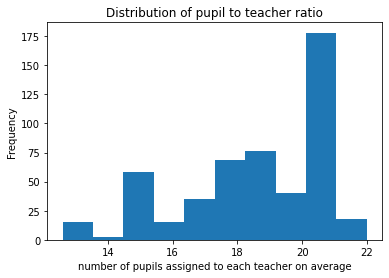

In [48]:
plt.hist(boston_df["PTRATIO"])
plt.xlabel("number of pupils assigned to each teacher on average")
plt.ylabel("Frequency")
plt.title("Distribution of pupil to teacher ratio")
plt.show()

<hr/>

# Section 3: Statistical testing

<hr/>

## Task 6: Applying a t-test

### Question: Is there a significant difference in median value of houses bounded by the Charles river or not? 

**Null Hypothesis:** There *is no* difference in medians <br>
**Alternative Hypothesis:** There *is* a difference in medians <br>
**Alpha value:** 0.05 (5% threshold)

#### Interpretation of p values
1. If a p-value is *less than* 0.05 (alpha), then result is significant. Accpet Alternative Hypothesis.
2. If a p-value is *greater than* 0.05 (alpha), then result is insignificant. Accept Null Hypothesis.

In [26]:
#Test for significant difference in means
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

**Results:** pvalue of 0.00323 (3sf) is less than alpha value of 0.05 <br>
**Conclusion:** Variance is significantly different. In t-testing must set equal_var=False

In [29]:
#Apply t-test for independent samples
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=3.113291312794837, pvalue=0.003567170098137517)

**Results:** p value of 0.00357 (3sf) is less than alpha value of 0.05 <br>
**Conclusion:** Accept Alternative Hypothesis. Medians are significantly different. 

## Task 7: Apply ANOVA

### Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

**Null Hypothesis:** There *is no* difference in medians <br>
**Alternative Hypothesis:** There *is* a difference in medians <br>
**Alpha value:** 0.05 (5% threshold)

#### Interpretation of p values
1. If a p-value is *less than* 0.05 (alpha), then result is significant. Accpet Alternative Hypothesis.
2. If a p-value is *greater than* 0.05 (alpha), then result is insignificant. Accept Null Hypothesis.

In [32]:
lower = boston_df[boston_df["age_group"]=="35 years and younger"]["MEDV"]
middle = boston_df[boston_df["age_group"]=="between 35 and 70 years"]["MEDV"]
upper = boston_df[boston_df["age_group"]=="70 years and older"]["MEDV"]

f_statistic, p_value = scipy.stats.f_oneway(lower, middle, upper)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Results:** p value of 1.71c-15 (3sf) is less than alpha value of 0.05 <br>
**Conclusion:** Accept Alternative Hypothesis. There is significant variations between the medians. <br>

## Task 8: Apply Pearson correlation

### Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

**Null Hypothesis:** There *is no* correlation <br>
**Alternative Hypothesis:** There *is* a correlation <br>
**Alpha value:** 0.05 (5% threshold)

#### Interpretation of p values
1. If a p-value is *less than* 0.05 (alpha), then result is significant. Accpet Alternative Hypothesis.
2. If a p-value is *greater than* 0.05 (alpha), then result is insignificant. Accept Null Hypothesis.

In [33]:
#Applying the pearson r test from the scipy package
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

(0.7636514469209151, 7.913361061238693e-98)

**Results:** p value of 1.91c-98 (3sf) is less than alpha value of 0.05 <br>
**Conclusion:** Accept Alternative Hypothesis. There is significant correlation between the two variables. <br>
Note: A positive linear correlation with sterength of 0.764 (3sf)

## Task 9: Build a linear regression model

### Question: What is the impact of an additional weighted distance to the five Boston employment centres (DIS) on the median value of owner occupied homes (MEDV)?

**Null Hypothesis:** There *is no* linear correlation <br>
**Alternative Hypothesis:** There *is* a linear correlation <br>
**Alpha value:** 0.05 (5% threshold)

In [50]:
##Selection correct variables

## x is the exploratory/independent variable
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

## Building a linear ordinary least squared model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 07 Dec 2022   Prob (F-statistic):           1.21e-08
Time:                        14:43:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Results:** p value of 1.12e-08 (3sf) is less than alpha value of 0.05 <br>
**Conclusion:** Accept Alternative Hypothesis. There is significant correlation between the two variables. <br>
Note: A positive linear correlation with sterength of 0.249 (3sf)

<hr/>

# End of Notebook

<hr/>